In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
import copy
from IPython.display import display, Video
from io import BytesIO
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import imageio.v2 as imageio

import tempfile

from kmeans import Kmeans, assign_data_to_centroids, kmeans_loss_function
from kmeans_plotting import Plot1DKmeans, Plot2DKmeans

In [6]:
# Cargar dataset
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

iris_df['original_label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),original_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#hay 3 clusters, iremos cambiando el random state
kmeans = KMeans(n_clusters=3, max_iter=300, random_state = 1)
#cluster es k, que es 3, max iter es el numero de iteraciones
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\irene\anaconda3\envs\Aprendizaje_automatico\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=2) #vamos cambiando y se va cambiando las iteraciones 
#cluster es k, que es 3, max iter es el numero de iteraciones
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\irene\anaconda3\envs\Aprendizaje_automatico\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Comparamos nuestros resultados con las variedades reales de iris

In [18]:
iris_df["cluster"] = kmeans.labels_
iris_df.groupby(['original_label','cluster']).agg({'sepal length (cm)': 'count'})

sepal length (cm)
original_label cluster                   
0              1                       50
1              0                       48
               2                        2
2              0                       14
               2                       36

Vemos que las flores del tipo 0 nos la está metiendo todas en un cluster, lo está haciendo bien. Las flores del tipo 1 y 2 nos las está dividiendo en dos clusters, no lo está ajustando bien. Esto puede ser por el escalado, así que tenemos que probar con el reescalado

Preprocesado

Este algoritmo mide distancias, y como tal debe tenerse en cuenta:

Escalas: Los atributos pueden tener escalas muy distintas. Por eso es importante normalizar los datos.
Atributos categóricos: Para medir distancia entre atributos categóricos necesitamos transformarlos a numéricos, para poder usar las fórmulas de distancia.
Importancia de los atributos: Si un atributo es más importante que otro, se puede ponderar la distancia de cada atributo modificando la fórmula de distancia o bien el rango de valores del atributo.

In [19]:
from sklearn import preprocessing

cols = iris_df.columns[:-2]  # Exclude 'target' and 'cluster' columns

iris_df_norm = iris_df[cols].copy()
iris_df_norm[cols] = preprocessing.normalize(iris_df[cols])
iris_df_norm["original_label"] = iris_df["original_label"]
iris_df_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),original_label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.751400,0.405174,0.454784,0.141071,1.000000
std,0.044368,0.105624,0.159986,0.077977,0.819232
min,0.653877,0.238392,0.167836,0.014727,0.000000
25%,0.715261,0.326738,0.250925,0.048734,0.000000
50%,0.754883,0.354371,0.536367,0.164148,1.000000
75%,0.786912,0.527627,0.580025,0.197532,2.000000
max,0.860939,0.607125,0.636981,0.280419,2.000000


In [20]:
kmeans_norm = KMeans(n_clusters=3, max_iter=300, random_state=1)
kmeans_norm.fit(iris_df_norm[cols])

iris_df_norm["cluster"] = kmeans_norm.labels_
iris_df_norm.groupby(['original_label','cluster']).agg({'sepal length (cm)': 'count'})

c:\Users\irene\anaconda3\envs\Aprendizaje_automatico\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


sepal length (cm)
original_label cluster                   
0              1                       50
1              0                       45
               2                        5
2              2                       50

Como se puede observar, mejora la clase 2, está ahora metida en un único cluster

Hiperparámetros
Hemos visto que el único hiperparámetro de  
k
 -means es el número de clústers  
k
 , pero también hemos visto animaciones que mostraban que el algoritmo es muy sensible a este valor.

¿Cómo elegir  
k
 ?

Vamos a encontrar el mejor valor de  
k
  mediante el elbow method.

Elbow method
El elbow method es una técnia heurística utilizada para determinar el número óptimo de clústers  
k
 . Consiste en representar la distancia cuadrática dentro de cada clúster en función del número de clústers e identificar el punto "codo" del gráfico, a partir del cual el descenso de la distancia cuadrática dentro de los clústers se hace más lento. Esto indica que añadir nuevos clústers no mejor el coste.

c:\Users\irene\anaconda3\envs\Aprendizaje_automatico\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\irene\anaconda3\envs\Aprendizaje_automatico\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\irene\anaconda3\envs\Aprendizaje_automatico\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\irene\anaconda3\envs\Aprendizaje_automatico

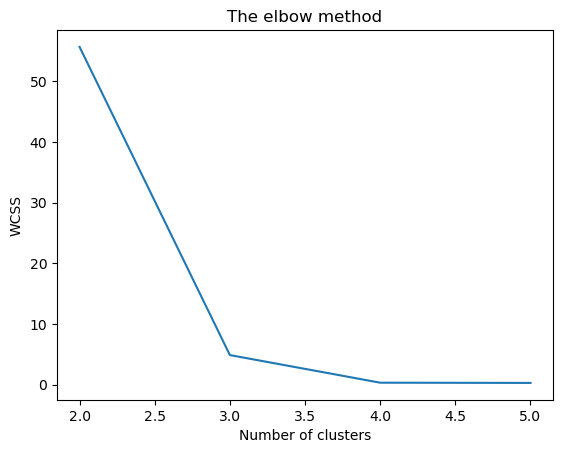

In [21]:
K = range(2, 6)
wcss = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(iris_df_norm)
    
    # append the model to fits
    wcss.append(model.inertia_)
    
plt.plot(range(2, 6), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()